# Flappy Bird with TD Learning

**Objective**: Train a set of agents to learn how to play Flappy Bird game

This notebook is part of Udacity's Nanodegree Machine Learning Engineer. It provides the training and evaluation codes to every RL agent.

For every RL algorithm (Sarsa, Q-Learning ($\epsilon$-greedy policy) and Expected Sarsa ($\epsilon$-greedy policy)) we will test three different learning rate ($\alpha$) parameter and two discount factors ($\gamma$) parameters:


|parameters    | $\alpha=0.10$ | $\alpha=0.15$ | $\alpha=0.25$ |
|--------------|---------------|---------------|---------------|
|$\gamma=1.00$ | Result1       | Result2       | Result3       |
|$\gamma=0.90$ | Result4       | Result5       | Result6       |


The _Result*_ in the table above is refered to our project metric $AvgScore_{100}$, the average game score for the last 100 episodes.

## TL;DR - Results

Here are the results of this training:

### Sarsa

|parameters | ⍺=0.10 | ⍺=0.15 | ⍺=0.25 |
|-----------|--------|--------|--------|
| γ=1.00    | 0      | 0      | 0      |
| γ=0.90    | 0      | 0      | 0      |

### Q-Learning

|parameters  | ⍺=0.10 | ⍺=0.15 | ⍺=0.25         |
|--------|--------|--------|----------------|
| γ=1.00 | 0.22   | 0.37   | 0.40   |
| γ=0.90 | 0.30   | 0.25   | 0.12           |

### Expected Sarsa

| parametes       | ⍺=0.10 | ⍺=0.15 | ⍺=0.25 |
|--------|--------|--------|--------|
| γ=1.00 | 0.13   | 0.13   | 0.11   |
| γ=0.90 | 0.09   | 0      | 0      |

Our best agent was the Q-Learning with parameters $\alpha = 0.25$ and $\gamma = 1.00$.

## Imports and Configs

In [1]:
from environment import FlappyEnvironment
from agent import Sarsa, QLearning, ExpectedSarsa

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
%matplotlib inline
np.random.seed(42)

In [3]:
env = FlappyEnvironment()

In [4]:
n_episodes = 10000
n_episodes_range = [x+1 for x in range(n_episodes)]

## Defining useful functions

In [5]:
def plot_training_results(result_df, algorithm_title, figure_filename, figsize=(16,6)):
    plt.subplots(figsize=figsize)
    plt.plot(result_df.index, result_df['score'], label='Scores', color='b')
    plt.plot(
        result_df.index, 
        result_df['score'].rolling(window=100).mean(), 
        label='Avg Scores every 100 episodes', 
        color='red'
    )
    plt.title(algorithm_title)
    plt.ylabel('Score')
    plt.xlabel('# Episodes')
    plt.legend()
    plt.savefig(f'images/{figure_filename}.png')
    plt.show()

The `plot_training_results` function provides a plot with containing every episode score (the <span style="color:blue">blue line</span>) as well a rolling average score for every 100 episodes (the <span style="color:red"> red line</span>) to check its consistency.

In [6]:
def get_epsilon(n_episode):
    return 1 - 0.045 * n_episode

The idea of `get_epsilon` method is to decrease $\epsilon$ linearly until it reaches the value 0.10 by the episode 200 (2% of the total episodes).

## How it works

Let's take an example of how the training process works:

```Python
sarsa_scores = []

for i_episode in range(1, n_episodes + 1):
    env = FlappyEnvironment()
    sarsa.learn(env)
    sarsa_scores.append(env.game_score)
    
    if i_episode % 100 == 0:
        print("\rEpisode {}/{} - Max Score {}".format(i_episode, n_episodes, np.array(sarsa_scores).max()), end="")
        sys.stdout.flush()
    
    sarsa.epsilon = get_epsilon(i_episode)
        
sarsa.save_q_values()
sarsa_df = pd.DataFrame(data=sarsa_scores, index=n_episodes_range, columns=['score'])
```

Every time the class `FlappyEnvironment()` is instanced it means it's a new game, so every episode means a new game. 

For every game there's a `learn` step in the agent in which it will interact with the game's environment and it learns from it until the game is over (bird collides with either pipe or floor). 

Every 100 episodes both episode number and _Max Score_ are displayed. After the episode is finished, the $\epsilon$ parameter is changed with the method `get_episode`.

Finally, after the training process, a dataframe with the results is created.

This process is the same for every agent and every combination of parameters.

---

# $\alpha = 0.10$ ; $\gamma = 1.00$

In [7]:
alpha = 0.10
gamma = 1.00

## Sarsa

In [8]:
sarsa = Sarsa(action_space=env.action_space, alpha=alpha, gamma=gamma)

In [9]:
sarsa_scores = []

for i_episode in range(1, n_episodes + 1):
    env = FlappyEnvironment()
    sarsa.learn(env)
    sarsa_scores.append(env.game_score)
    
    if i_episode % 100 == 0:
        print("\rEpisode {}/{} - Max Score {}".format(i_episode, n_episodes, np.array(sarsa_scores).max()), end="")
        sys.stdout.flush()
    
    sarsa.epsilon = get_epsilon(i_episode)
        
sarsa.save_q_values()
sarsa_df = pd.DataFrame(data=sarsa_scores, index=n_episodes_range, columns=['score'])

Episode 10000/10000 - Max Score 0

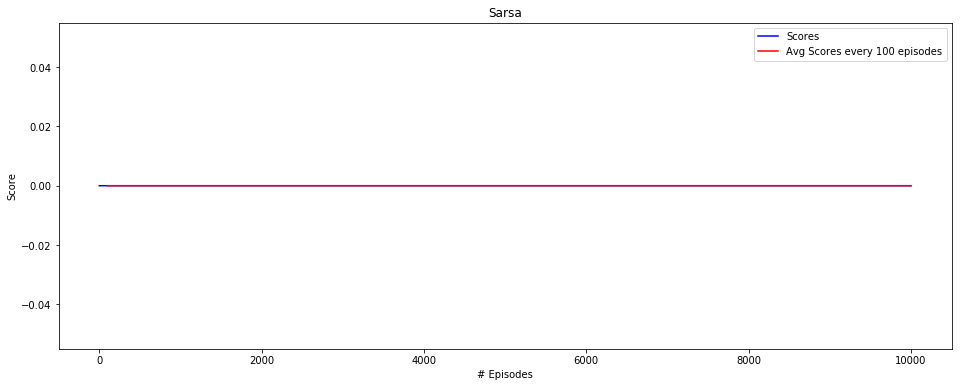

In [10]:
plot_training_results(sarsa_df, "Sarsa", f"sarsa_training_scores_alpha_{alpha}_gamma_{gamma}")

## Q-Learning

In [11]:
qlearning = QLearning(action_space=env.action_space, alpha=alpha, gamma=gamma)

In [12]:
q_learning_scores = []

for i_episode in range(1, n_episodes + 1):
    env = FlappyEnvironment()
    if i_episode % 100 == 0:
        print("\rEpisode {}/{} - Max Score {}".format(i_episode, n_episodes, np.array(q_learning_scores).max()), end="")
        sys.stdout.flush()
        
    qlearning.learn(env)
    q_learning_scores.append(env.game_score)
    qlearning.epsilon = get_epsilon(i_episode)
    
qlearning.save_q_values()
q_learning_df = pd.DataFrame(data=q_learning_scores, index=n_episodes_range, columns=['score'])

Episode 10000/10000 - Max Score 6

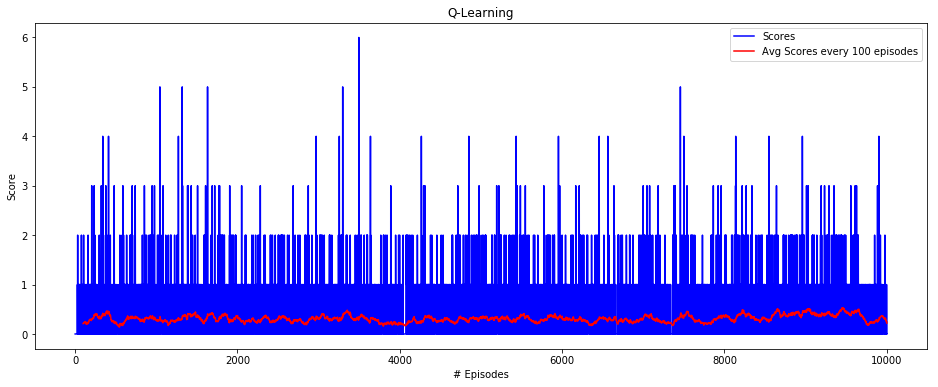

In [13]:
plot_training_results(q_learning_df, "Q-Learning", f"q_learning_training_scores_alpha_{alpha}_gamma_{gamma}")

## Expected Sarsa

In [14]:
expected_sarsa = ExpectedSarsa(env.action_space, alpha=alpha, gamma=gamma)

In [15]:
expected_sarsa_scores = []

for i_episode in range(1, n_episodes + 1):
    env = FlappyEnvironment()
    if i_episode % 100 == 0:
        print("\rEpisode {}/{} - Max Score {}".format(i_episode, n_episodes, np.array(expected_sarsa_scores).max()), end="")
        sys.stdout.flush()
        
    expected_sarsa.learn(env)
    expected_sarsa_scores.append(env.game_score)
    expected_sarsa.epsilon = get_epsilon(i_episode)
    
expected_sarsa.save_q_values()
expecte_sarsa_df = pd.DataFrame(data=expected_sarsa_scores, index=n_episodes_range, columns=['score'])

Episode 10000/10000 - Max Score 1

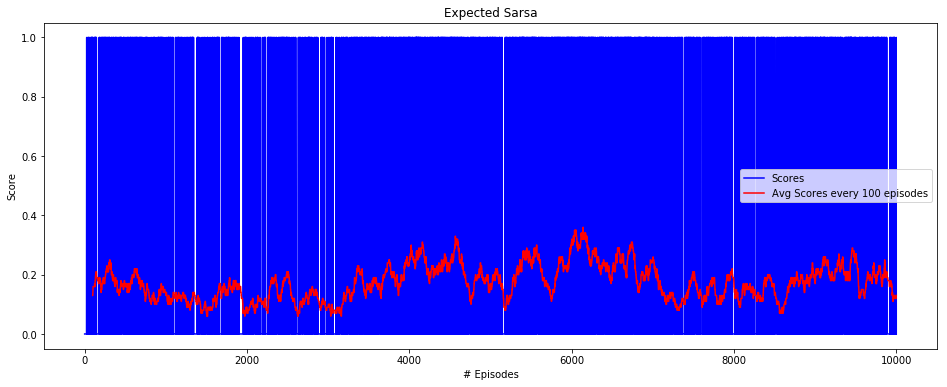

In [16]:
plot_training_results(expecte_sarsa_df, "Expected Sarsa", f"expected_sarsa_training_scores_alpha_{alpha}_gamma_{gamma}")

# Model Comparison

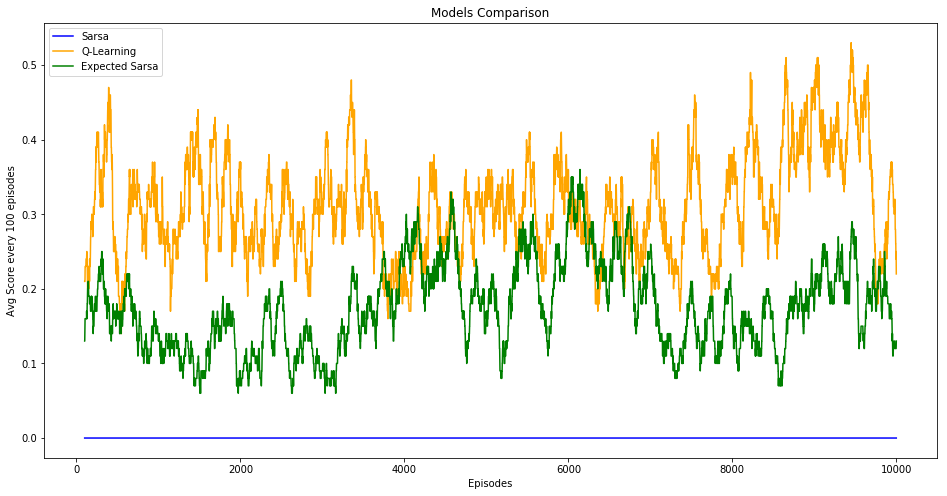

In [17]:
plt.subplots(figsize=(16, 8))
plt.title("Models Comparison")
plt.plot(sarsa_df.index, sarsa_df['score'].rolling(window=100).mean(), label='Sarsa', color='blue')
plt.plot(q_learning_df.index, q_learning_df['score'].rolling(window=100).mean(), label='Q-Learning', color='orange')
plt.plot(expecte_sarsa_df.index, expecte_sarsa_df['score'].rolling(window=100).mean(), label='Expected Sarsa', color='green')
plt.xlabel('Episodes')
plt.ylabel("Avg Score every 100 episodes")
plt.legend()
plt.savefig(f"images/model_comparison_alpha_{alpha}_gamma_{gamma}.png")
plt.show()

In [18]:
sarsa_final_score = sarsa_df['score'].rolling(window=100).mean().tail(1)
qlearning_final_score = q_learning_df['score'].rolling(window=100).mean().tail(1)
expected_sarsa_final_score = expecte_sarsa_df['score'].rolling(window=100).mean().tail(1)

In [19]:
pd.DataFrame(
    {
        'Sarsa': sarsa_final_score,
        'Q-Learning': qlearning_final_score,
        'Expected Sarsa': expected_sarsa_final_score,
        'Benchmark Model': 675,
        'AvgScore100': 'AvgScore100'
    }
).set_index("AvgScore100")

,Sarsa,Q-Learning,Expected Sarsa,Benchmark Model
AvgScore100,,,,
AvgScore100,0.0,0.22,0.13,675


---

# $\alpha = 0.15$ ; $\gamma = 1.00$

In [20]:
alpha = 0.15
gamma = 1.00

## Sarsa

In [21]:
sarsa = Sarsa(action_space=env.action_space, alpha=alpha, gamma=gamma)

In [22]:
sarsa_scores = []

for i_episode in range(1, n_episodes + 1):
    env = FlappyEnvironment()
    sarsa.learn(env)
    sarsa_scores.append(env.game_score)
    
    if i_episode % 100 == 0:
        print("\rEpisode {}/{} - Max Score {}".format(i_episode, n_episodes, np.array(sarsa_scores).max()), end="")
        sys.stdout.flush()
    
    sarsa.epsilon = get_epsilon(i_episode)
        
sarsa.save_q_values()
sarsa_df = pd.DataFrame(data=sarsa_scores, index=n_episodes_range, columns=['score'])

Episode 10000/10000 - Max Score 0

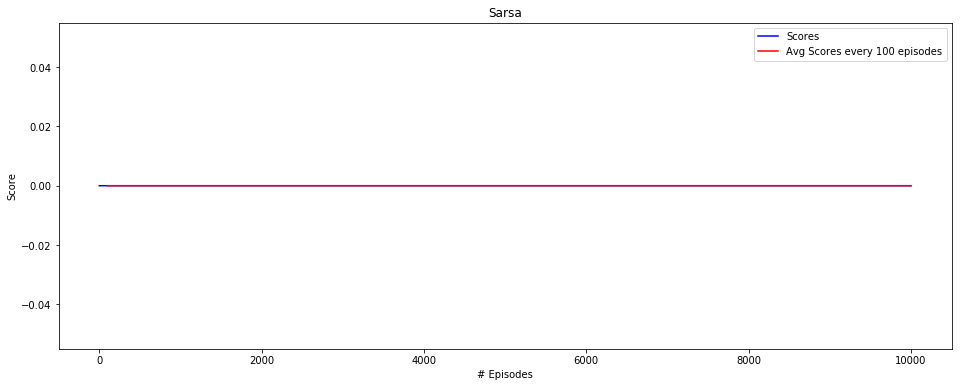

In [23]:
plot_training_results(sarsa_df, "Sarsa", f"sarsa_training_scores_alpha_{alpha}_gamma_{gamma}")

## Q-Learning

In [24]:
qlearning = QLearning(action_space=env.action_space, alpha=alpha, gamma=gamma)

In [25]:
q_learning_scores = []

for i_episode in range(1, n_episodes + 1):
    env = FlappyEnvironment()
    if i_episode % 100 == 0:
        print("\rEpisode {}/{} - Max Score {}".format(i_episode, n_episodes, np.array(q_learning_scores).max()), end="")
        sys.stdout.flush()
        
    qlearning.learn(env)
    q_learning_scores.append(env.game_score)
    qlearning.epsilon = get_epsilon(i_episode)
    
qlearning.save_q_values()
q_learning_df = pd.DataFrame(data=q_learning_scores, index=n_episodes_range, columns=['score'])

Episode 10000/10000 - Max Score 8

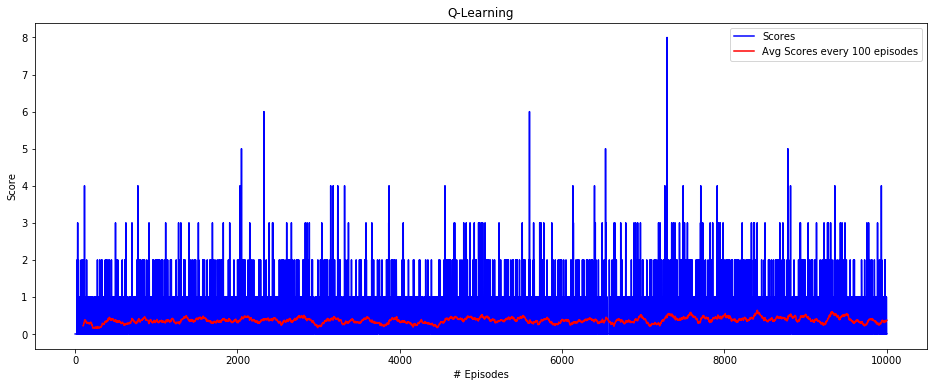

In [26]:
plot_training_results(q_learning_df, "Q-Learning", f"q_learning_training_scores_alpha_{alpha}_gamma_{gamma}")

## Expected Sarsa

In [27]:
expected_sarsa = ExpectedSarsa(env.action_space, alpha=alpha, gamma=gamma)

In [28]:
expected_sarsa_scores = []

for i_episode in range(1, n_episodes + 1):
    env = FlappyEnvironment()
    if i_episode % 100 == 0:
        print("\rEpisode {}/{} - Max Score {}".format(i_episode, n_episodes, np.array(expected_sarsa_scores).max()), end="")
        sys.stdout.flush()
        
    expected_sarsa.learn(env)
    expected_sarsa_scores.append(env.game_score)
    expected_sarsa.epsilon = get_epsilon(i_episode)
    
expected_sarsa.save_q_values()
expecte_sarsa_df = pd.DataFrame(data=expected_sarsa_scores, index=n_episodes_range, columns=['score'])

Episode 10000/10000 - Max Score 1

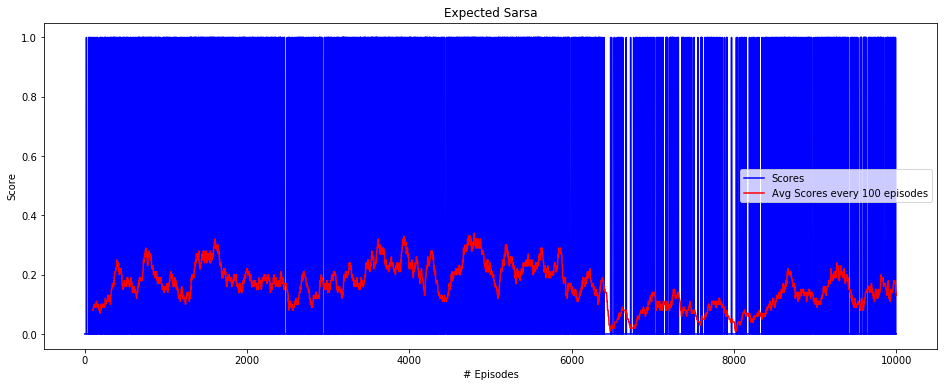

In [29]:
plot_training_results(expecte_sarsa_df, "Expected Sarsa", f"expected_sarsa_training_scores_alpha_{alpha}_gamma_{gamma}")

# Model Comparison

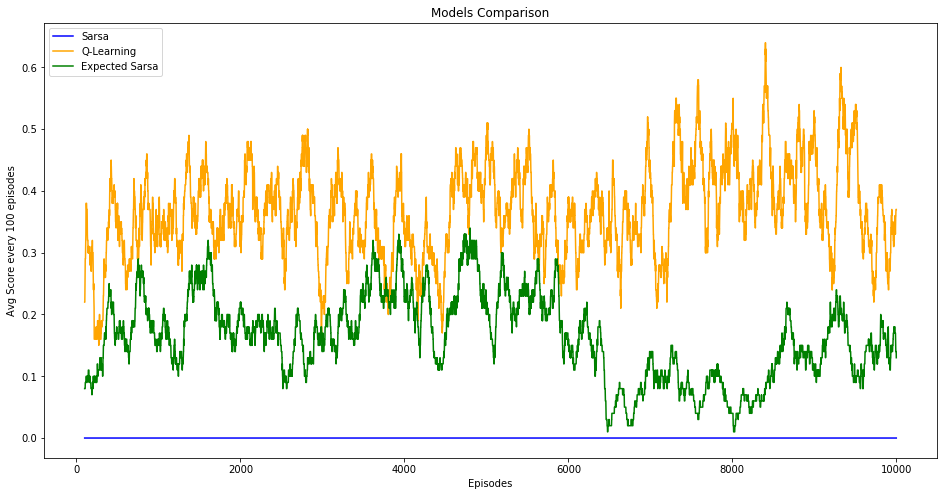

In [30]:
plt.subplots(figsize=(16, 8))
plt.title("Models Comparison")
plt.plot(sarsa_df.index, sarsa_df['score'].rolling(window=100).mean(), label='Sarsa', color='blue')
plt.plot(q_learning_df.index, q_learning_df['score'].rolling(window=100).mean(), label='Q-Learning', color='orange')
plt.plot(expecte_sarsa_df.index, expecte_sarsa_df['score'].rolling(window=100).mean(), label='Expected Sarsa', color='green')
plt.xlabel('Episodes')
plt.ylabel("Avg Score every 100 episodes")
plt.legend()
plt.savefig(f"images/model_comparison_alpha_{alpha}_gamma_{gamma}.png")
plt.show()

In [31]:
sarsa_final_score = sarsa_df['score'].rolling(window=100).mean().tail(1)
qlearning_final_score = q_learning_df['score'].rolling(window=100).mean().tail(1)
expected_sarsa_final_score = expecte_sarsa_df['score'].rolling(window=100).mean().tail(1)

In [32]:
pd.DataFrame(
    {
        'Sarsa': sarsa_final_score,
        'Q-Learning': qlearning_final_score,
        'Expected Sarsa': expected_sarsa_final_score,
        'Benchmark Model': 675,
        'AvgScore100': 'AvgScore100'
    }
).set_index("AvgScore100")

,Sarsa,Q-Learning,Expected Sarsa,Benchmark Model
AvgScore100,,,,
AvgScore100,0.0,0.37,0.13,675


---

# $\alpha = 0.25$ ; $\gamma = 1.00$

In [33]:
alpha = 0.25
gamma = 1.00

## Sarsa

In [34]:
sarsa = Sarsa(action_space=env.action_space, alpha=alpha, gamma=gamma)

In [35]:
sarsa_scores = []

for i_episode in range(1, n_episodes + 1):
    env = FlappyEnvironment()
    sarsa.learn(env)
    sarsa_scores.append(env.game_score)
    
    if i_episode % 100 == 0:
        print("\rEpisode {}/{} - Max Score {}".format(i_episode, n_episodes, np.array(sarsa_scores).max()), end="")
        sys.stdout.flush()
    
    sarsa.epsilon = get_epsilon(i_episode)
        
sarsa.save_q_values()
sarsa_df = pd.DataFrame(data=sarsa_scores, index=n_episodes_range, columns=['score'])

Episode 10000/10000 - Max Score 0

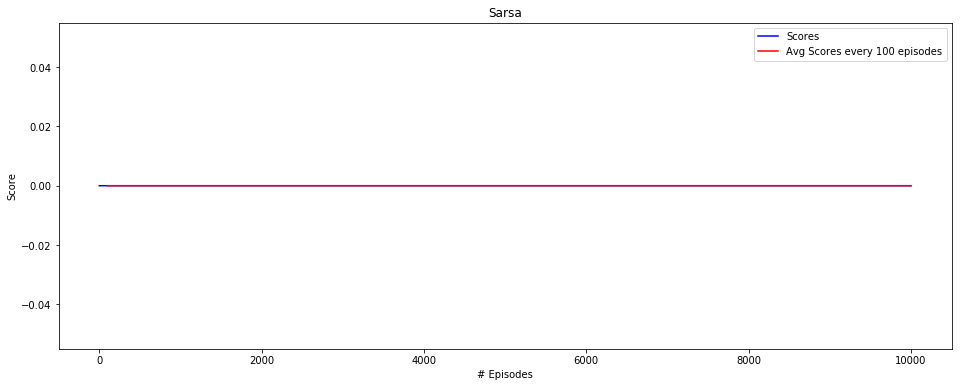

In [36]:
plot_training_results(sarsa_df, "Sarsa", f"sarsa_training_scores_alpha_{alpha}_gamma_{gamma}")

## Q-Learning

In [37]:
qlearning = QLearning(action_space=env.action_space, alpha=alpha, gamma=gamma)

In [38]:
q_learning_scores = []

for i_episode in range(1, n_episodes + 1):
    env = FlappyEnvironment()
    if i_episode % 100 == 0:
        print("\rEpisode {}/{} - Max Score {}".format(i_episode, n_episodes, np.array(q_learning_scores).max()), end="")
        sys.stdout.flush()
        
    qlearning.learn(env)
    q_learning_scores.append(env.game_score)
    qlearning.epsilon = get_epsilon(i_episode)
    
qlearning.save_q_values()
q_learning_df = pd.DataFrame(data=q_learning_scores, index=n_episodes_range, columns=['score'])

Episode 10000/10000 - Max Score 6

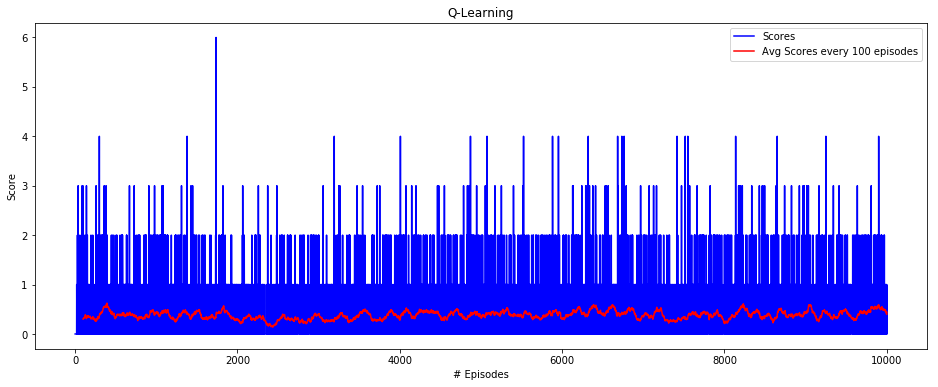

In [39]:
plot_training_results(q_learning_df, "Q-Learning", f"q_learning_training_scores_alpha_{alpha}_gamma_{gamma}")

## Expected Sarsa

In [40]:
expected_sarsa = ExpectedSarsa(env.action_space, alpha=alpha, gamma=gamma)

In [41]:
expected_sarsa_scores = []

for i_episode in range(1, n_episodes + 1):
    env = FlappyEnvironment()
    if i_episode % 100 == 0:
        print("\rEpisode {}/{} - Max Score {}".format(i_episode, n_episodes, np.array(expected_sarsa_scores).max()), end="")
        sys.stdout.flush()
        
    expected_sarsa.learn(env)
    expected_sarsa_scores.append(env.game_score)
    expected_sarsa.epsilon = get_epsilon(i_episode)
    
expected_sarsa.save_q_values()
expecte_sarsa_df = pd.DataFrame(data=expected_sarsa_scores, index=n_episodes_range, columns=['score'])

Episode 10000/10000 - Max Score 1

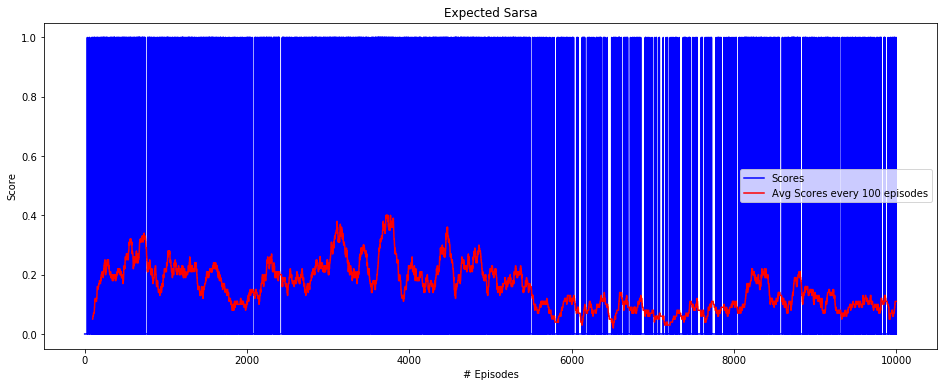

In [42]:
plot_training_results(expecte_sarsa_df, "Expected Sarsa", f"expected_sarsa_training_scores_alpha_{alpha}_gamma_{gamma}")

# Model Comparison

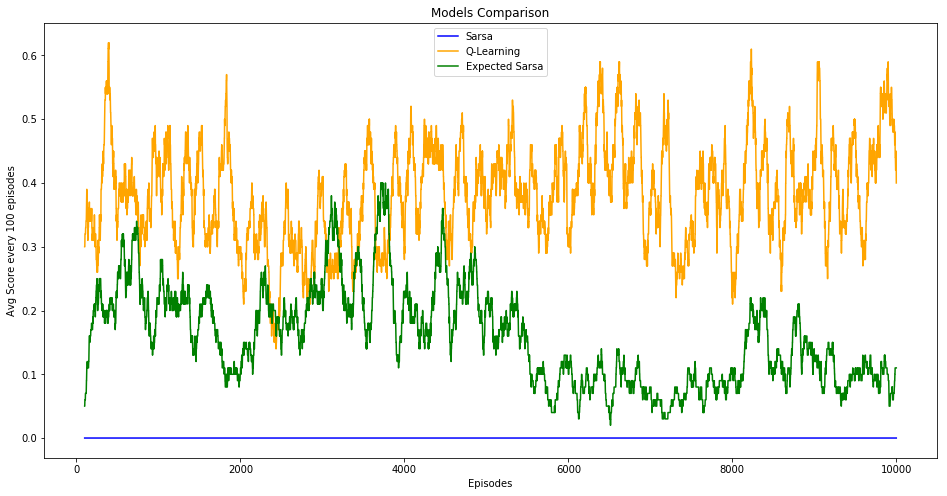

In [43]:
plt.subplots(figsize=(16, 8))
plt.title("Models Comparison")
plt.plot(sarsa_df.index, sarsa_df['score'].rolling(window=100).mean(), label='Sarsa', color='blue')
plt.plot(q_learning_df.index, q_learning_df['score'].rolling(window=100).mean(), label='Q-Learning', color='orange')
plt.plot(expecte_sarsa_df.index, expecte_sarsa_df['score'].rolling(window=100).mean(), label='Expected Sarsa', color='green')
plt.xlabel('Episodes')
plt.ylabel("Avg Score every 100 episodes")
plt.legend()
plt.savefig(f"images/model_comparison_alpha_{alpha}_gamma_{gamma}.png")
plt.show()

In [44]:
sarsa_final_score = sarsa_df['score'].rolling(window=100).mean().tail(1)
qlearning_final_score = q_learning_df['score'].rolling(window=100).mean().tail(1)
expected_sarsa_final_score = expecte_sarsa_df['score'].rolling(window=100).mean().tail(1)

In [45]:
pd.DataFrame(
    {
        'Sarsa': sarsa_final_score,
        'Q-Learning': qlearning_final_score,
        'Expected Sarsa': expected_sarsa_final_score,
        'Benchmark Model': 675,
        'AvgScore100': 'AvgScore100'
    }
).set_index("AvgScore100")

,Sarsa,Q-Learning,Expected Sarsa,Benchmark Model
AvgScore100,,,,
AvgScore100,0.0,0.4,0.11,675


---

# $\alpha = 0.10$ ; $\gamma = 0.90$

In [46]:
alpha = 0.10
gamma = 0.90

## Sarsa

In [47]:
sarsa = Sarsa(action_space=env.action_space, alpha=alpha, gamma=gamma)

In [48]:
sarsa_scores = []

for i_episode in range(1, n_episodes + 1):
    env = FlappyEnvironment()
    sarsa.learn(env)
    sarsa_scores.append(env.game_score)
    
    if i_episode % 100 == 0:
        print("\rEpisode {}/{} - Max Score {}".format(i_episode, n_episodes, np.array(sarsa_scores).max()), end="")
        sys.stdout.flush()
    
    sarsa.epsilon = get_epsilon(i_episode)
        
sarsa.save_q_values()
sarsa_df = pd.DataFrame(data=sarsa_scores, index=n_episodes_range, columns=['score'])

Episode 10000/10000 - Max Score 0

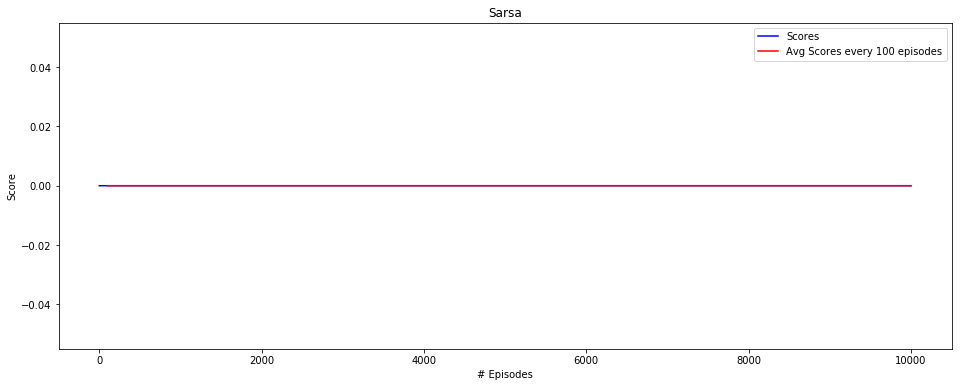

In [49]:
plot_training_results(sarsa_df, "Sarsa", f"sarsa_training_scores_alpha_{alpha}_gamma_{gamma}")

## Q-Learning

In [50]:
qlearning = QLearning(action_space=env.action_space, alpha=alpha, gamma=gamma)

In [51]:
q_learning_scores = []

for i_episode in range(1, n_episodes + 1):
    env = FlappyEnvironment()
    if i_episode % 100 == 0:
        print("\rEpisode {}/{} - Max Score {}".format(i_episode, n_episodes, np.array(q_learning_scores).max()), end="")
        sys.stdout.flush()
        
    qlearning.learn(env)
    q_learning_scores.append(env.game_score)
    qlearning.epsilon = get_epsilon(i_episode)
    
qlearning.save_q_values()
q_learning_df = pd.DataFrame(data=q_learning_scores, index=n_episodes_range, columns=['score'])

Episode 10000/10000 - Max Score 6

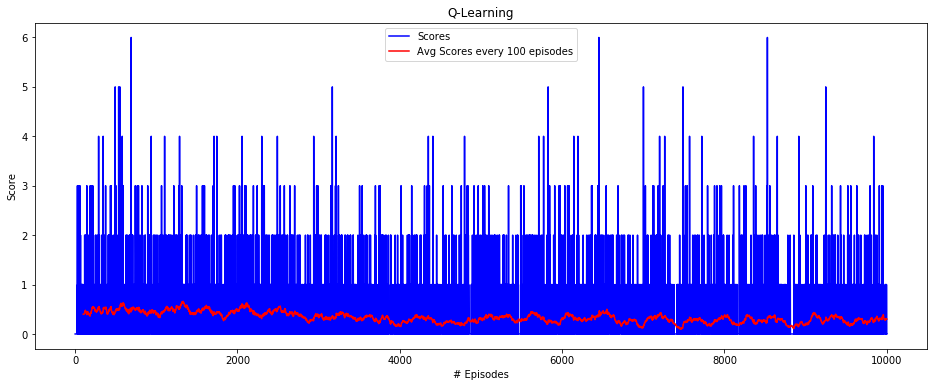

In [52]:
plot_training_results(q_learning_df, "Q-Learning", f"q_learning_training_scores_alpha_{alpha}_gamma_{gamma}")

## Expected Sarsa

In [53]:
expected_sarsa = ExpectedSarsa(env.action_space, alpha=alpha, gamma=gamma)

In [54]:
expected_sarsa_scores = []

for i_episode in range(1, n_episodes + 1):
    env = FlappyEnvironment()
    if i_episode % 100 == 0:
        print("\rEpisode {}/{} - Max Score {}".format(i_episode, n_episodes, np.array(expected_sarsa_scores).max()), end="")
        sys.stdout.flush()
        
    expected_sarsa.learn(env)
    expected_sarsa_scores.append(env.game_score)
    expected_sarsa.epsilon = get_epsilon(i_episode)
    
expected_sarsa.save_q_values()
expecte_sarsa_df = pd.DataFrame(data=expected_sarsa_scores, index=n_episodes_range, columns=['score'])

Episode 10000/10000 - Max Score 1

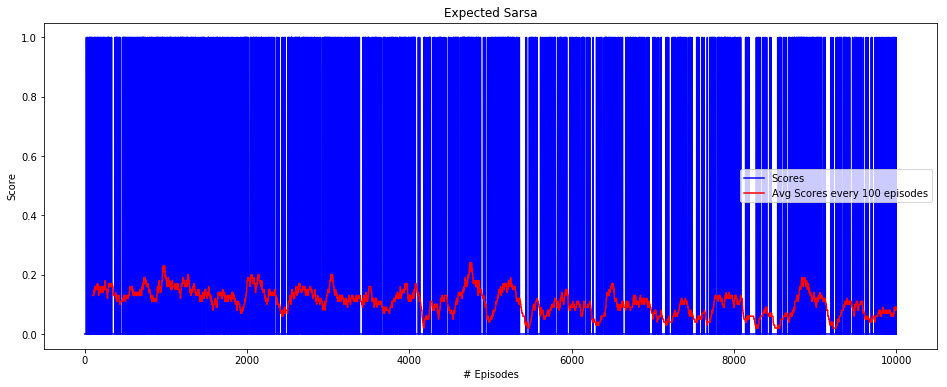

In [55]:
plot_training_results(expecte_sarsa_df, "Expected Sarsa", f"expected_sarsa_training_scores_alpha_{alpha}_gamma_{gamma}")

# Model Comparison

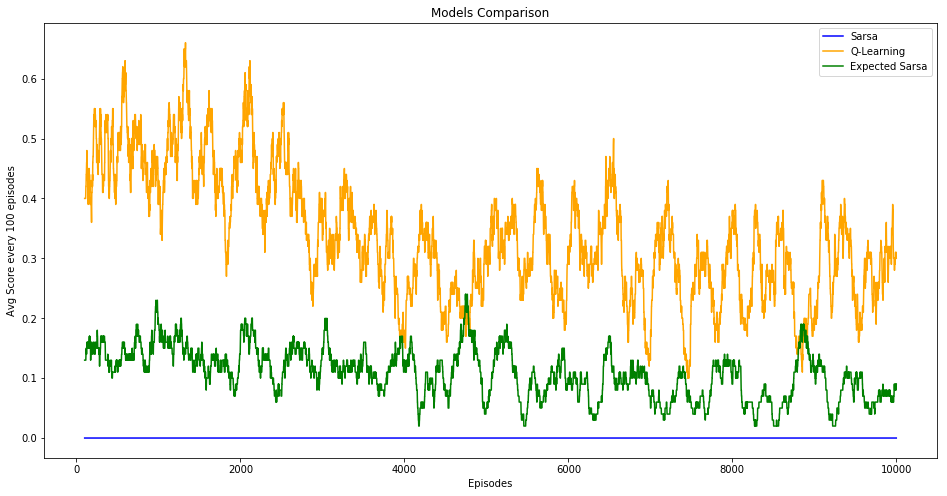

In [56]:
plt.subplots(figsize=(16, 8))
plt.title("Models Comparison")
plt.plot(sarsa_df.index, sarsa_df['score'].rolling(window=100).mean(), label='Sarsa', color='blue')
plt.plot(q_learning_df.index, q_learning_df['score'].rolling(window=100).mean(), label='Q-Learning', color='orange')
plt.plot(expecte_sarsa_df.index, expecte_sarsa_df['score'].rolling(window=100).mean(), label='Expected Sarsa', color='green')
plt.xlabel('Episodes')
plt.ylabel("Avg Score every 100 episodes")
plt.legend()
plt.savefig(f"images/model_comparison_alpha_{alpha}_gamma_{gamma}.png")
plt.show()

In [57]:
sarsa_final_score = sarsa_df['score'].rolling(window=100).mean().tail(1)
qlearning_final_score = q_learning_df['score'].rolling(window=100).mean().tail(1)
expected_sarsa_final_score = expecte_sarsa_df['score'].rolling(window=100).mean().tail(1)

In [58]:
pd.DataFrame(
    {
        'Sarsa': sarsa_final_score,
        'Q-Learning': qlearning_final_score,
        'Expected Sarsa': expected_sarsa_final_score,
        'Benchmark Model': 675,
        'AvgScore100': 'AvgScore100'
    }
).set_index("AvgScore100")

,Sarsa,Q-Learning,Expected Sarsa,Benchmark Model
AvgScore100,,,,
AvgScore100,0.0,0.3,0.09,675


---

# $\alpha = 0.15$ ; $\gamma = 0.90$

In [59]:
alpha = 0.15
gamma = 0.90

## Sarsa

In [60]:
sarsa = Sarsa(action_space=env.action_space, alpha=alpha, gamma=gamma)

In [61]:
sarsa_scores = []

for i_episode in range(1, n_episodes + 1):
    env = FlappyEnvironment()
    sarsa.learn(env)
    sarsa_scores.append(env.game_score)
    
    if i_episode % 100 == 0:
        print("\rEpisode {}/{} - Max Score {}".format(i_episode, n_episodes, np.array(sarsa_scores).max()), end="")
        sys.stdout.flush()
    
    sarsa.epsilon = get_epsilon(i_episode)
        
sarsa.save_q_values()
sarsa_df = pd.DataFrame(data=sarsa_scores, index=n_episodes_range, columns=['score'])

Episode 10000/10000 - Max Score 0

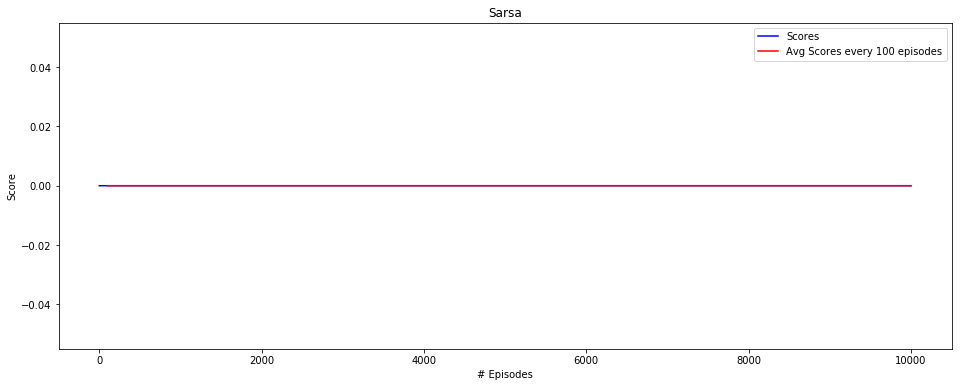

In [62]:
plot_training_results(sarsa_df, "Sarsa", f"sarsa_training_scores_alpha_{alpha}_gamma_{gamma}")

## Q-Learning

In [63]:
qlearning = QLearning(action_space=env.action_space, alpha=alpha, gamma=gamma)

In [64]:
q_learning_scores = []

for i_episode in range(1, n_episodes + 1):
    env = FlappyEnvironment()
    if i_episode % 100 == 0:
        print("\rEpisode {}/{} - Max Score {}".format(i_episode, n_episodes, np.array(q_learning_scores).max()), end="")
        sys.stdout.flush()
        
    qlearning.learn(env)
    q_learning_scores.append(env.game_score)
    qlearning.epsilon = get_epsilon(i_episode)
    
qlearning.save_q_values()
q_learning_df = pd.DataFrame(data=q_learning_scores, index=n_episodes_range, columns=['score'])

Episode 10000/10000 - Max Score 6

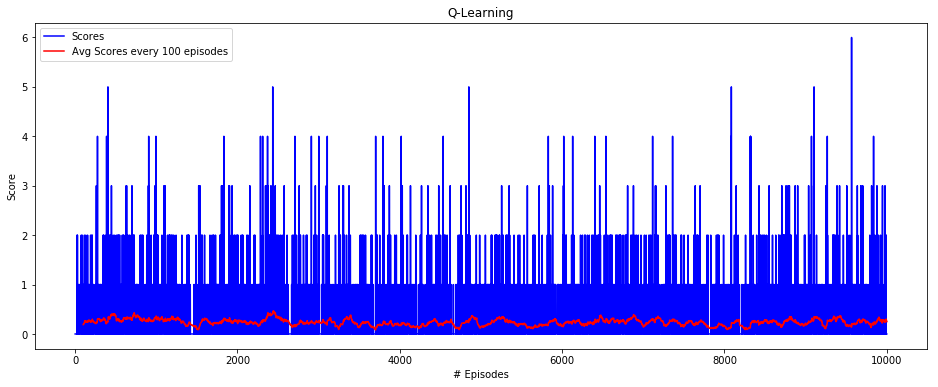

In [65]:
plot_training_results(q_learning_df, "Q-Learning", f"q_learning_training_scores_alpha_{alpha}_gamma_{gamma}")

## Expected Sarsa

In [66]:
expected_sarsa = ExpectedSarsa(env.action_space, alpha=alpha, gamma=gamma)

In [67]:
expected_sarsa_scores = []

for i_episode in range(1, n_episodes + 1):
    env = FlappyEnvironment()
    if i_episode % 100 == 0:
        print("\rEpisode {}/{} - Max Score {}".format(i_episode, n_episodes, np.array(expected_sarsa_scores).max()), end="")
        sys.stdout.flush()
        
    expected_sarsa.learn(env)
    expected_sarsa_scores.append(env.game_score)
    expected_sarsa.epsilon = get_epsilon(i_episode)
    
expected_sarsa.save_q_values()
expecte_sarsa_df = pd.DataFrame(data=expected_sarsa_scores, index=n_episodes_range, columns=['score'])

Episode 10000/10000 - Max Score 1

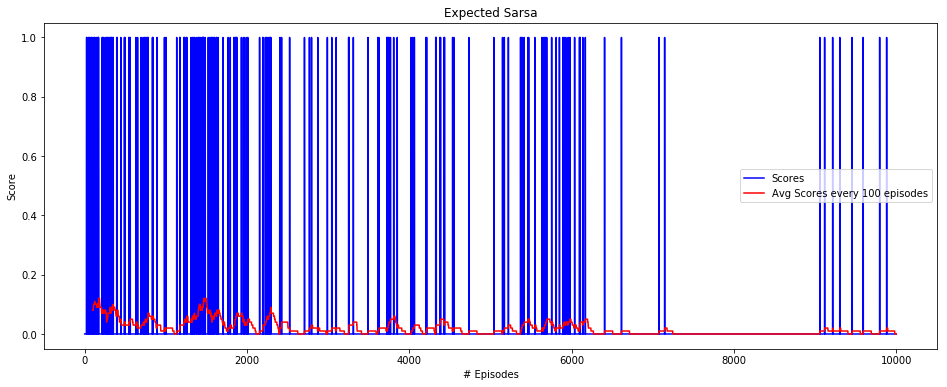

In [68]:
plot_training_results(expecte_sarsa_df, "Expected Sarsa", f"expected_sarsa_training_scores_alpha_{alpha}_gamma_{gamma}")

# Model Comparison

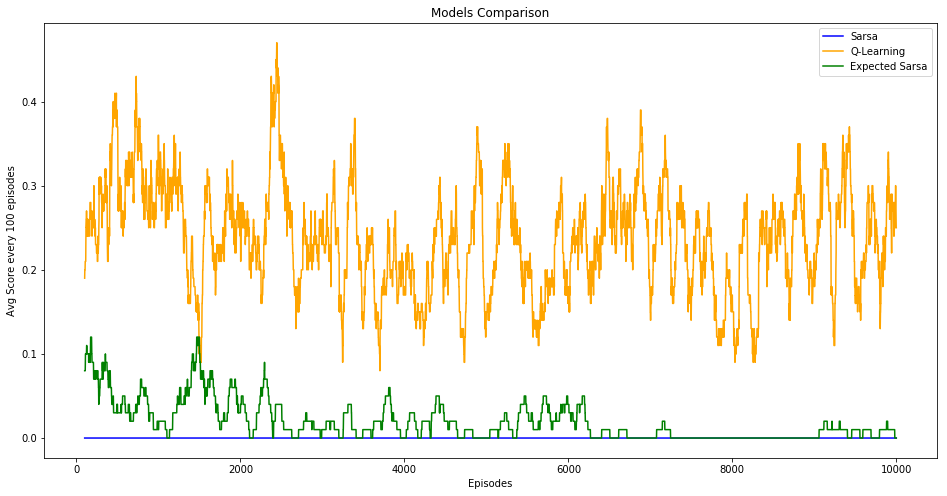

In [69]:
plt.subplots(figsize=(16, 8))
plt.title("Models Comparison")
plt.plot(sarsa_df.index, sarsa_df['score'].rolling(window=100).mean(), label='Sarsa', color='blue')
plt.plot(q_learning_df.index, q_learning_df['score'].rolling(window=100).mean(), label='Q-Learning', color='orange')
plt.plot(expecte_sarsa_df.index, expecte_sarsa_df['score'].rolling(window=100).mean(), label='Expected Sarsa', color='green')
plt.xlabel('Episodes')
plt.ylabel("Avg Score every 100 episodes")
plt.legend()
plt.savefig(f"images/model_comparison_alpha_{alpha}_gamma_{gamma}.png")
plt.show()

In [70]:
sarsa_final_score = sarsa_df['score'].rolling(window=100).mean().tail(1)
qlearning_final_score = q_learning_df['score'].rolling(window=100).mean().tail(1)
expected_sarsa_final_score = expecte_sarsa_df['score'].rolling(window=100).mean().tail(1)

In [71]:
pd.DataFrame(
    {
        'Sarsa': sarsa_final_score,
        'Q-Learning': qlearning_final_score,
        'Expected Sarsa': expected_sarsa_final_score,
        'Benchmark Model': 675,
        'AvgScore100': 'AvgScore100'
    }
).set_index("AvgScore100")

,Sarsa,Q-Learning,Expected Sarsa,Benchmark Model
AvgScore100,,,,
AvgScore100,0.0,0.25,0.0,675


---

# $\alpha = 0.25$ ; $\gamma = 0.90$

In [72]:
alpha = 0.25
gamma = 0.90

## Sarsa

In [73]:
sarsa = Sarsa(action_space=env.action_space, alpha=alpha, gamma=gamma)

In [74]:
sarsa_scores = []

for i_episode in range(1, n_episodes + 1):
    env = FlappyEnvironment()
    sarsa.learn(env)
    sarsa_scores.append(env.game_score)
    
    if i_episode % 100 == 0:
        print("\rEpisode {}/{} - Max Score {}".format(i_episode, n_episodes, np.array(sarsa_scores).max()), end="")
        sys.stdout.flush()
    
    sarsa.epsilon = get_epsilon(i_episode)
        
sarsa.save_q_values()
sarsa_df = pd.DataFrame(data=sarsa_scores, index=n_episodes_range, columns=['score'])

Episode 10000/10000 - Max Score 0

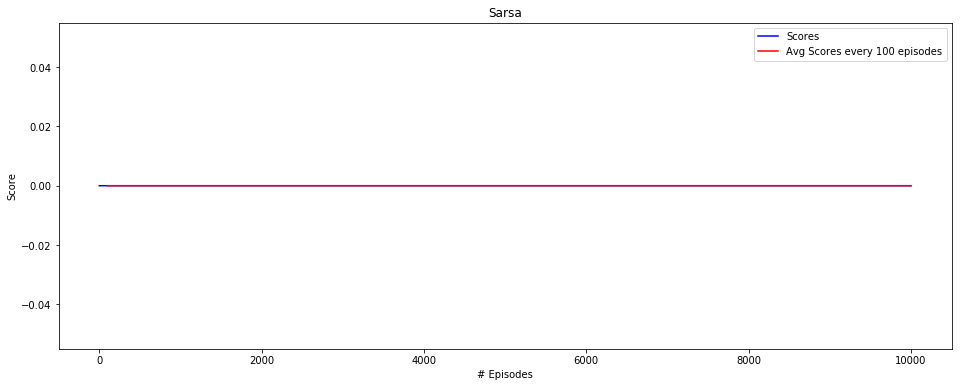

In [75]:
plot_training_results(sarsa_df, "Sarsa", f"sarsa_training_scores_alpha_{alpha}_gamma_{gamma}")

## Q-Learning

In [76]:
qlearning = QLearning(action_space=env.action_space, alpha=alpha, gamma=gamma)

In [77]:
q_learning_scores = []

for i_episode in range(1, n_episodes + 1):
    env = FlappyEnvironment()
    if i_episode % 100 == 0:
        print("\rEpisode {}/{} - Max Score {}".format(i_episode, n_episodes, np.array(q_learning_scores).max()), end="")
        sys.stdout.flush()
        
    qlearning.learn(env)
    q_learning_scores.append(env.game_score)
    qlearning.epsilon = get_epsilon(i_episode)
    
qlearning.save_q_values()
q_learning_df = pd.DataFrame(data=q_learning_scores, index=n_episodes_range, columns=['score'])

Episode 10000/10000 - Max Score 6

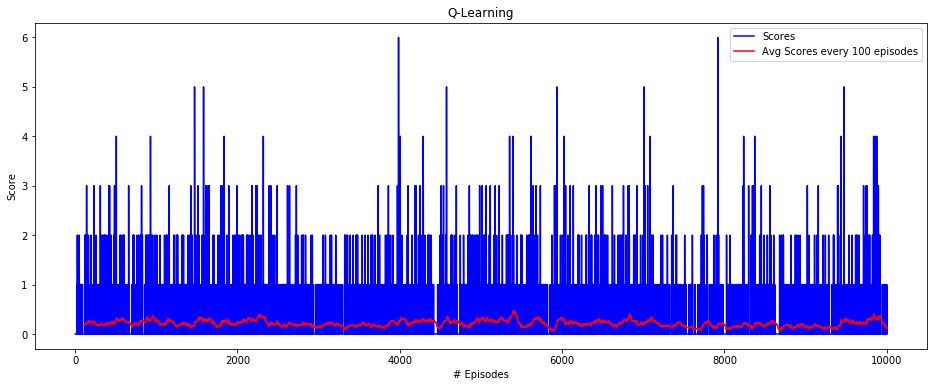

In [78]:
plot_training_results(q_learning_df, "Q-Learning", f"q_learning_training_scores_alpha_{alpha}_gamma_{gamma}")

## Expected Sarsa

In [79]:
expected_sarsa = ExpectedSarsa(env.action_space, alpha=alpha, gamma=gamma)

In [80]:
expected_sarsa_scores = []

for i_episode in range(1, n_episodes + 1):
    env = FlappyEnvironment()
    if i_episode % 100 == 0:
        print("\rEpisode {}/{} - Max Score {}".format(i_episode, n_episodes, np.array(expected_sarsa_scores).max()), end="")
        sys.stdout.flush()
        
    expected_sarsa.learn(env)
    expected_sarsa_scores.append(env.game_score)
    expected_sarsa.epsilon = get_epsilon(i_episode)
    
expected_sarsa.save_q_values()
expecte_sarsa_df = pd.DataFrame(data=expected_sarsa_scores, index=n_episodes_range, columns=['score'])

Episode 10000/10000 - Max Score 1

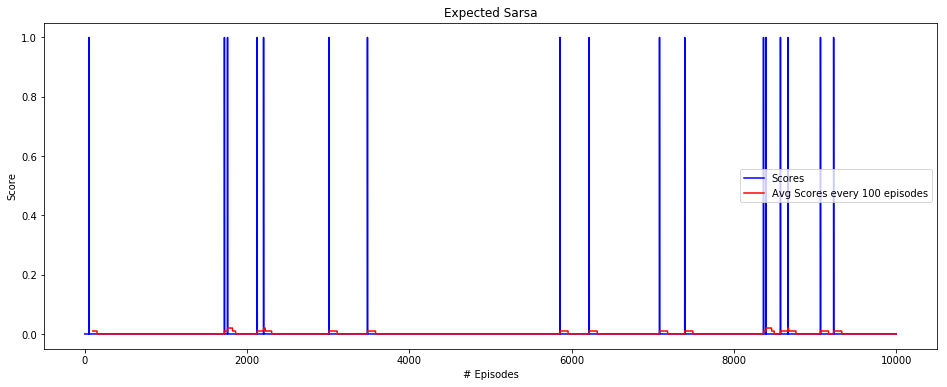

In [81]:
plot_training_results(expecte_sarsa_df, "Expected Sarsa", f"expected_sarsa_training_scores_alpha_{alpha}_gamma_{gamma}")

# Model Comparison

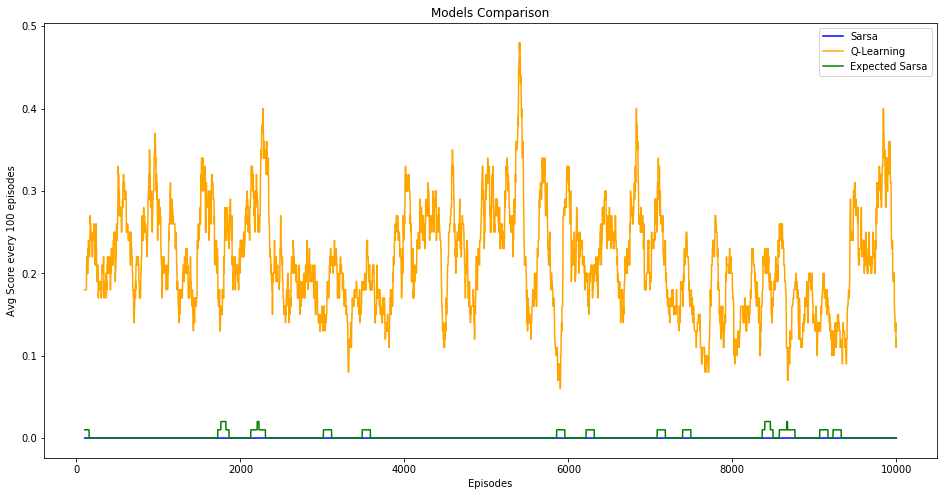

In [82]:
plt.subplots(figsize=(16, 8))
plt.title("Models Comparison")
plt.plot(sarsa_df.index, sarsa_df['score'].rolling(window=100).mean(), label='Sarsa', color='blue')
plt.plot(q_learning_df.index, q_learning_df['score'].rolling(window=100).mean(), label='Q-Learning', color='orange')
plt.plot(expecte_sarsa_df.index, expecte_sarsa_df['score'].rolling(window=100).mean(), label='Expected Sarsa', color='green')
plt.xlabel('Episodes')
plt.ylabel("Avg Score every 100 episodes")
plt.legend()
plt.savefig(f"images/model_comparison_alpha_{alpha}_gamma_{gamma}.png")
plt.show()

In [83]:
sarsa_final_score = sarsa_df['score'].rolling(window=100).mean().tail(1)
qlearning_final_score = q_learning_df['score'].rolling(window=100).mean().tail(1)
expected_sarsa_final_score = expecte_sarsa_df['score'].rolling(window=100).mean().tail(1)

In [84]:
pd.DataFrame(
    {
        'Sarsa': sarsa_final_score,
        'Q-Learning': qlearning_final_score,
        'Expected Sarsa': expected_sarsa_final_score,
        'Benchmark Model': 675,
        'AvgScore100': 'AvgScore100'
    }
).set_index("AvgScore100")

,Sarsa,Q-Learning,Expected Sarsa,Benchmark Model
AvgScore100,,,,
AvgScore100,0.0,0.12,0.0,675
